## hw8pr2: &nbsp; Embeddings: computing with word _meanings_

About a decade ago, the computing community proposed a representation of the _meaning_ of words as _embeddings_.

Embeddings are large vectors of weights that capture a word's use in context. They can be created by training a neural network to "predict the missing word" (from lots of possible contexts where it appears). 

Here, you will try out the original word-embeddings, called Word2Vec. 

In [10]:
#
# hw8pr2.py ~ cs35 ~ Word Embeddings: Computing with word _meanings_
#

# our usual libraries
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns

### Gensim is a library for word-meanings

Most often, the _meaning_ of a word is a vector, or ***embedding*** that has been learned through a neural net:
+ that net is trained to determine each word from its context
+ many variations are now used
+ here, we use the original embeddings -- which better illustrate many of their weaknesses! 
+ from the word2vec paper: https://arxiv.org/abs/1301.3781

In [11]:
# Most important for hw8 is gensim, the word-embedding (word2vec) library
# See if you already have it installed:
#import gensim

# if not, try         
!pip install gensim

In [ ]:
# !pip install gensim

In [12]:
# The word-embeddings are in the large file word2vec_model.txt

# Make sure that file is here:
%ls

01 神學大全 第一冊：論天主三位一體（I. Q 1~43） (Thomas Aquinas (santo)) (Z-Library).pdf
06-7-24.pdf
07530203.pdf
1-s2.0-S2213177921005837-main.pdf
1012868606267-10557326579-ticket.pdf
104_weierstrass (1) (1).pdf
104_weierstrass (1).pdf
1103053942.pdf
11daa872-3de0-4883-be79-32b89719ca5f
1214437136.pdf
1357324.jpeg
144_HW_3.pdf
165_Final_project_report.pdf
165_final_project (1).pdf
165_final_project.pdf
171_HW_5.pdf
18-functions and continuity notes.pdf
1Q84 BOOK 2 (村上春树) (Z-Library).mobi
1ResearchProjectData.csv
1ResearchProjectData.sav
2001：太空漫游（读客熊猫君出品。刘慈欣说：我所有作品都是对《2001：太空漫游》的拙劣模仿！科幻历史上不可超越的至高神作！） (阿瑟·克拉克 [... (Z-Library).pdf
2008.pdf
22-uniform convergence.pdf
24S-135-Homework01 (1).tex
24S-135-Homework01.tex
24S-135-Homework02.tex
24S-135-Homework08 4XP .pdf
24S-135-HomeworkTemplate (1).tex
24S-135-HomeworkTemplate (3).tex
24S-135-HomeworkTemplate.tex
4-fields order bounds.pdf
5303c476725ac6ee4b4f6dbc357c2a34.jpg
5308.pdf
6:28:2024 meeting notes.pdf
7-closure and dense sets (1).pdf
7-closure and 

In [1]:
#
# This function, read_word2vec_model, wraps the creation of a gensim model, let's say, m
#
#      To use it, run the line   m = read_word2vec_model()
#

from gensim.models import KeyedVectors

def read_word2vec_model(filename = "word2vec_model.txt"):  
    """ a function that reads a word2vec model from the file
        "word2vec_model.txt" and returns a model object that
        we will usually name m or model...
    """
    try:
        print("Starting to load the model in ", filename, "...")
        model = KeyedVectors.load_word2vec_format(filename, binary=False)
        print("Model loaded.\n")
    except FileNotFoundError as e:
        print(f"  [WARNING]    The file {filename} was not found.     [WARNING]  ")
        return None   # returning a placeholder, not a model

    # let's print some attributes
    print("The model built is", model, "\n")
    print("The vocabulary has", model.vectors.shape[0], "words")   # The vocabulary has 43981 words
    print("Each word is a vector of size", model.vector_size)  # 300
    print("\nTry m.get_vector('python') to see a the vector for 'python'!")
    print("m is dictionary-like, e.g., try 'python' in m\n")
    model.fill_norms()  # freezes the model, m, as-is (no more training)
    # we weren't going to train more, so no worries (in week7, at least)
    return model


In [2]:
# 
# best to run this only once... or once in a while, as needed
#

m = read_word2vec_model()

Starting to load the model in  word2vec_model.txt ...
Model loaded.

The model built is KeyedVectors<vector_size=300, 43981 keys> 

The vocabulary has 43981 words
Each word is a vector of size 300

Try m.get_vector('python') to see a the vector for 'python'!
m is dictionary-like, e.g., try 'python' in m



In [3]:
print(f"m is {m}")   # let's see how it prints...

m is KeyedVectors<vector_size=300, 43981 keys>


In [4]:
'python' in m

True

In [ ]:
m.get_vector('python')

#### Let's see the "meaning" (the vector or embedding) for 'queen':

First, we'll make sure 'queen' is in the model, <tt>m</tt>

In [5]:
'queen' in m

True

In [6]:
m.get_vector('queen')

array([ 0.00173332, -0.0474043 , -0.022896  ,  0.0407935 ,  0.0435346 ,
       -0.0293455 , -0.0235409 , -0.0715902 , -0.0651406 ,  0.0183813 ,
       -0.0249921 , -0.125767  ,  0.0343439 , -0.00026957,  0.043857  ,
        0.0372462 ,  0.0240246 , -0.015479  ,  0.0217673 ,  0.0311192 ,
        0.0628833 ,  0.045147  , -0.0780398 , -0.0391811 ,  0.021606  ,
       -0.0175751 , -0.101903  ,  0.030313  ,  0.0622383 , -0.0551438 ,
       -0.0515965 , -0.0432121 , -0.0272494 ,  0.0703003 , -0.117382  ,
       -0.0435346 ,  0.0317641 ,  0.0870691 , -0.0312804 ,  0.0606259 ,
        0.0353114 , -0.137376  ,  0.089004  , -0.00915032,  0.0580461 ,
       -0.0372462 , -0.00136046,  0.0480493 ,  0.0515965 ,  0.0883591 ,
       -0.00592554,  0.0325703 ,  0.0174944 , -0.0103193 , -0.0538539 ,
       -0.0191875 , -0.113512  , -0.0570787 ,  0.03773   , -0.0298292 ,
        0.044502  ,  0.0922288 , -0.0164464 ,  0.0428896 ,  0.0580461 ,
       -0.0732026 , -0.0039302 ,  0.0464369 , -0.059981  ,  0.03

Let's use an <tt>if</tt> to check whether a particular word is in the model:

In [7]:
if 'poptart' in m:
    print("That word is in m")
else:
    print("That word is NOT in m")

That word is NOT in m


In [8]:
#
# So, we can check the "meaning" of 'king', 'queen', 'snake', and 'python':
#
m.get_vector('snake')   # m.get_vector('queen')  m.get_vector('snake')   m.get_vector('king')

# which are not very useful ... until we compare them to other meanings:

array([ 2.97324e-02,  4.28927e-02, -7.08380e-02, -1.60035e-02,
       -6.46640e-02,  1.22667e-02, -1.47037e-02, -3.93996e-03,
       -5.13413e-02,  8.57854e-02,  6.10896e-02, -1.39076e-01,
       -3.18446e-02, -1.56786e-02, -7.73368e-02, -3.80185e-02,
        2.94075e-02, -1.60035e-02, -1.91717e-02, -3.96433e-02,
        3.00574e-02,  1.98013e-03,  8.83850e-02,  3.76936e-02,
       -4.35426e-02,  2.30711e-02, -5.94649e-02,  2.61581e-02,
        1.58573e-01, -5.71903e-02, -3.43223e-03,  8.77351e-02,
       -5.58905e-02, -4.71170e-02,  2.55894e-03,  1.29470e-03,
        1.22667e-02, -2.35585e-02, -1.30790e-02,  7.60371e-02,
        5.75152e-02, -1.57598e-02,  4.41925e-02,  3.81810e-02,
       -1.00083e-01, -3.42817e-02,  2.69704e-02,  4.45174e-02,
        6.62887e-02, -1.92530e-02, -1.05607e-02,  8.18861e-02,
        1.11781e-01, -7.76618e-02,  9.42340e-02,  2.86358e-03,
        4.38675e-02, -5.19912e-02,  1.09831e-01,  1.33227e-01,
        1.30790e-02,  3.86684e-02,  3.81810e-02,  4.906

#### <tt>similarity</tt>

The model has a built-in similarity method:

In [9]:
# Let's see the built-in similarity method
m.similarity('python','snake')   # should be .6606292...

#

0.66062915

###  hw8pr2 Task #1: &nbsp;&nbsp; Let's re-implement <tt>similarity</tt> to create/build intuition:

This is an example to run - it's already implemented: 

In [10]:
# First, a couple of variable-assignment statements
# These might start to feel disturbingly meta ...
python = m.get_vector('python')
snake = m.get_vector('snake')
language = m.get_vector('language')
code = m.get_vector('code')
queen = m.get_vector('queen')

In [11]:
import numpy as np
print(f"{np.linalg.norm(python) = }")  # this is the length of the vector - always 1, watch out for rounding

# the dot product is available in the numpy library
print(f"{np.dot(python, snake) = }")

# This is exactly the built-in similarity:

np.linalg.norm(python) = 1.0000002
np.dot(python, snake) = 0.66062933


In [ ]:
# we can use np to find the angle, in degrees, between the two vectors :-)
deg = np.degrees(np.arccos(0.66063))  # dot is cosine; converting from radians to degrees
print(f"...which is {deg:7.2f} degrees")

# for unit vectors, "dot product" is the same as the "cosine similarity"  
#     which is the cos of the angle between the two vectors

In [ ]:
# Let's again see the built-in similarity method:
m.similarity('python','snake')   # should be the same .6606292...

In [ ]:
m.distance( 'python', 'snake' )   # The distance is 1 minus the similarity

In [ ]:
m.distance( 'python', 'coffee' )   # let's see...

In [ ]:
m.similarity('python','coffee')

<br>

###  hw8pr2 Task #2: exploring dataset bias

With the cell below as a starting point, explore different similarities to find one or more additional example of "dataset bias"

Include a cell explaining your example. Also, show how the dataset itself can _quantify_ the bias.

Here's a first example:

In [12]:
# with similarity, the biases of the datset can show through: let's check "programmer" vs "woman" and "man"
#
simw = m.similarity("programmer","woman")   # president  programmer
print(f"similarity w 'woman':  {simw:7.3f}")

simm = m.similarity("programmer","man")     # president  programmer
print(f"similarity w 'man':    {simm:7.3f}")

# notice that the values provide a starting-point to _quantify_ the bias in the dataset
# quantifying dataset bias is currently a very active area of research
# it would also be possible to compare both of these with 
print()
simprs = m.similarity("programmer","person")    # try it!
print(f"similarity w 'person': {simprs:7.3f}")

similarity w 'woman':    0.090
similarity w 'man':      0.126

similarity w 'person':   0.223


In [ ]:
#
# the dataset will reflect the biases of the training data / source-texts  (6B tokens from Google News)
#
# for task#2, as you explore possibilities, see if there is a way for the similarity-scores to quantify the biases present...
# 
# key constraint: lots of tokens are missing...

<br>

#### Computing multiple similarities...

In [13]:
# Let's compare multiple similarities:

python_snake = m.similarity('python','snake')
python_coffee = m.similarity('python','coffee')
snake_coffee = m.similarity('snake','coffee')

print(f"python_snake  similarity: {python_snake}")   # try :4.2f after the variable for formatting
print(f"python_coffee similarity: {python_coffee}")  # 4 characters wide, 2 places after the decimal point
print(f"snake_coffee  similarity: {snake_coffee}")

python_snake  similarity: 0.660629153251648
python_coffee similarity: 0.021258244290947914
snake_coffee  similarity: 0.07976286113262177


In [ ]:
#
# Let's define an "odd-one-out" from any collection of words, 
# simply by considering all possible similarities (and adding them up for each word)

"""
here, for example:

python_snake  similarity: .66
python_coffee similarity: .02
snake_coffee  similarity: .08

So, summing the similarities for each word separately:
  python:  .66 + .02 == .68
  coffee:  .08 + .02 == .10
  snake:   .66 + .08 == .74

+++ In this case, "coffee" is the odd one out  (intuitive, in some ways)


# What do you think about python, serpent, snake?
# or python, serpent, snake, code?

"""
None

In [14]:
# notice that the split function makes creating lists-of-words a bit easier
initial_words = "snake serpent python code ai ml programming".split()
initial_words

['snake', 'serpent', 'python', 'code', 'ai', 'ml', 'programming']

In [15]:
#
# here is a _single_ keyword, with similarities computed against every word w in initial_words
key = 'python'

LoS = []
LoW = []
for w in initial_words:
    if w in m:  # is the word, w present in the vocabulary?
        similarity = m.similarity(key,w)
        print(f"similarity between {key} and {w}: {similarity:6.2f}", )
        LoS.append( similarity )
        LoW.append( w )
    else:
        print(f"  __  {w}  __ was not in the vocabulary", )   # not every word will be present

print(f"LoS is {LoS}")
print(f"LoW is {LoW}")


similarity between python and snake:   0.66
similarity between python and serpent:   0.45
similarity between python and python:   1.00
similarity between python and code:   0.11
  __  ai  __ was not in the vocabulary
similarity between python and ml:   0.08
similarity between python and programming:   0.09
LoS is [0.66062915, 0.44771376, 1.0, 0.10966148, 0.08480783, 0.09035954]
LoW is ['snake', 'serpent', 'python', 'code', 'ml', 'programming']


Example: Comparing the similarities between musician, philosopher, mathematician, physicist, scientist, and artist

In [16]:
# Let's compare multiple similarities:

musician_philosopher = m.similarity('musician','philosopher')
musician_mathematician = m.similarity('musician','mathematician')
musician_physicist = m.similarity('musician','physicist')
musician_artist = m.similarity('musician','artist')

print(f"musician_philosopher  similarity: {musician_philosopher}")   # try :4.2f after the variable for formatting
print(f"musician_mathematician similarity: {musician_mathematician}")  # 4 characters wide, 2 places after the decimal point
print(f"musician_physicist  similarity: {musician_physicist}")
print(f"musician_artist  similarity: {musician_artist}")

musician_philosopher  similarity: 0.40087151527404785
musician_mathematician similarity: 0.3795289993286133
musician_physicist  similarity: 0.3178832530975342
musician_artist  similarity: 0.683772087097168


In [18]:
people = "musician philosopher mathematician physicist scientist artist".split()
people

['musician',
 'philosopher',
 'mathematician',
 'physicist',
 'scientist',
 'artist']

In [19]:
key = 'musician'

LoS = []
LoW = []
for p in people:
    if p in m:  # is the word, w present in the vocabulary?
        similarity = m.similarity(key,p)
        print(f"similarity between {key} and {p}: {similarity:6.2f}", )
        LoS.append( similarity )
        LoW.append( p )
    else:
        print(f"  __  {p}  __ was not in the vocabulary", )   # not every word will be present

print(f"LoS is {LoS}")
print(f"LoW is {LoW}")

similarity between musician and musician:   1.00
similarity between musician and philosopher:   0.40
similarity between musician and mathematician:   0.38
similarity between musician and physicist:   0.32
similarity between musician and scientist:   0.28
similarity between musician and artist:   0.68
LoS is [1.0, 0.40087152, 0.379529, 0.31788325, 0.28448194, 0.6837721]
LoW is ['musician', 'philosopher', 'mathematician', 'physicist', 'scientist', 'artist']


In [20]:
key = 'philosopher'

LoS = []
LoW = []
for p in people:
    if p in m:  # is the word, w present in the vocabulary?
        similarity = m.similarity(key,p)
        print(f"similarity between {key} and {p}: {similarity:6.2f}", )
        LoS.append( similarity )
        LoW.append( p )
    else:
        print(f"  __  {p}  __ was not in the vocabulary", )   # not every word will be present

print(f"LoS is {LoS}")
print(f"LoW is {LoW}")

similarity between philosopher and musician:   0.40
similarity between philosopher and philosopher:   1.00
similarity between philosopher and mathematician:   0.60
similarity between philosopher and physicist:   0.50
similarity between philosopher and scientist:   0.42
similarity between philosopher and artist:   0.34
LoS is [0.40087152, 1.0, 0.6021041, 0.4972618, 0.41936857, 0.34335732]
LoW is ['musician', 'philosopher', 'mathematician', 'physicist', 'scientist', 'artist']


In [21]:
key = 'mathematician'

LoS = []
LoW = []
for p in people:
    if p in m:  # is the word, w present in the vocabulary?
        similarity = m.similarity(key,p)
        print(f"similarity between {key} and {p}: {similarity:6.2f}", )
        LoS.append( similarity )
        LoW.append( p )
    else:
        print(f"  __  {p}  __ was not in the vocabulary", )   # not every word will be present

print(f"LoS is {LoS}")
print(f"LoW is {LoW}")

similarity between mathematician and musician:   0.38
similarity between mathematician and philosopher:   0.60
similarity between mathematician and mathematician:   1.00
similarity between mathematician and physicist:   0.69
similarity between mathematician and scientist:   0.58
similarity between mathematician and artist:   0.30
LoS is [0.379529, 0.6021041, 1.0, 0.6928618, 0.5794289, 0.2952537]
LoW is ['musician', 'philosopher', 'mathematician', 'physicist', 'scientist', 'artist']


In [22]:
key = 'physicist'

LoS = []
LoW = []
for p in people:
    if p in m:  # is the word, w present in the vocabulary?
        similarity = m.similarity(key,p)
        print(f"similarity between {key} and {p}: {similarity:6.2f}", )
        LoS.append( similarity )
        LoW.append( p )
    else:
        print(f"  __  {p}  __ was not in the vocabulary", )   # not every word will be present

print(f"LoS is {LoS}")
print(f"LoW is {LoW}")

similarity between physicist and musician:   0.32
similarity between physicist and philosopher:   0.50
similarity between physicist and mathematician:   0.69
similarity between physicist and physicist:   1.00
similarity between physicist and scientist:   0.74
similarity between physicist and artist:   0.24
LoS is [0.31788325, 0.4972618, 0.6928618, 1.0, 0.7408766, 0.24280126]
LoW is ['musician', 'philosopher', 'mathematician', 'physicist', 'scientist', 'artist']


In [23]:
key = 'scientist'

LoS = []
LoW = []
for p in people:
    if p in m:  # is the word, w present in the vocabulary?
        similarity = m.similarity(key,p)
        print(f"similarity between {key} and {p}: {similarity:6.2f}", )
        LoS.append( similarity )
        LoW.append( p )
    else:
        print(f"  __  {p}  __ was not in the vocabulary", )   # not every word will be present

print(f"LoS is {LoS}")
print(f"LoW is {LoW}")

similarity between scientist and musician:   0.28
similarity between scientist and philosopher:   0.42
similarity between scientist and mathematician:   0.58
similarity between scientist and physicist:   0.74
similarity between scientist and scientist:   1.00
similarity between scientist and artist:   0.27
LoS is [0.28448194, 0.41936857, 0.5794289, 0.7408766, 0.99999994, 0.27172416]
LoW is ['musician', 'philosopher', 'mathematician', 'physicist', 'scientist', 'artist']


In [24]:
key = 'artist'

LoS = []
LoW = []
for p in people:
    if p in m:  # is the word, w present in the vocabulary?
        similarity = m.similarity(key,p)
        print(f"similarity between {key} and {p}: {similarity:6.2f}", )
        LoS.append( similarity )
        LoW.append( p )
    else:
        print(f"  __  {p}  __ was not in the vocabulary", )   # not every word will be present

print(f"LoS is {LoS}")
print(f"LoW is {LoW}")

similarity between artist and musician:   0.68
similarity between artist and philosopher:   0.34
similarity between artist and mathematician:   0.30
similarity between artist and physicist:   0.24
similarity between artist and scientist:   0.27
similarity between artist and artist:   1.00
LoS is [0.6837721, 0.34335732, 0.2952537, 0.24280126, 0.27172416, 0.99999994]
LoW is ['musician', 'philosopher', 'mathematician', 'physicist', 'scientist', 'artist']


In [28]:
LoS = []
LoW = []
for p in people:
    for j in people:  # is the word, w present in the vocabulary?
        if p != j:
            similarity = m.similarity(p,j)
            print(f"similarity between {p} and {j}: {similarity:6.2f}", )
            LoS.append( similarity )
            LoW.append( p + "/" + j )

print(f"LoS is {LoS}")
print(f"LoW is {LoW}")

similarity between musician and philosopher:   0.40
similarity between musician and mathematician:   0.38
similarity between musician and physicist:   0.32
similarity between musician and scientist:   0.28
similarity between musician and artist:   0.68
similarity between philosopher and musician:   0.40
similarity between philosopher and mathematician:   0.60
similarity between philosopher and physicist:   0.50
similarity between philosopher and scientist:   0.42
similarity between philosopher and artist:   0.34
similarity between mathematician and musician:   0.38
similarity between mathematician and philosopher:   0.60
similarity between mathematician and physicist:   0.69
similarity between mathematician and scientist:   0.58
similarity between mathematician and artist:   0.30
similarity between physicist and musician:   0.32
similarity between physicist and philosopher:   0.50
similarity between physicist and mathematician:   0.69
similarity between physicist and scientist:   0.74


Among the these words, "physicist" and "scientist" are the most closely related words while "artist" and "physicist" are the least closely related words.

<br>

###  hw8pr1 task #3: computing the "odd-one-out"

Adapting the above cell as a starting point, create a function that computes the "odd one out"

That is, <tt>odd_one_out( LoW, m )</tt> should
+ take in LoW, a list-of-words
+ take in m, a gensim word-embedding model (of type KeyedVectors)
+ computing the similarities of all pairs-of-words across the elements of LoW
+ return the word with the lowest _sum_ across all of those similarities
+ (don't include any words not in the vocabulary)

There are other ways to compute "overall dissimilarity."  
+ For our purposes, this is a reasonable first approach.
+ Below is a cell with a signature line to get started:

When you have built this, test it with three new examples of your own design
+ Be sure that at least one example contains at least five words
+ How well do your examples work?
<br>

In [31]:
print(LoS)
print(LoW)
word_compare = {}
for i in range(len(LoS)):
    word_compare[LoW[i]] = LoS[i]
print(word_compare)

[0.40087152, 0.379529, 0.31788325, 0.28448194, 0.6837721, 0.40087152, 0.6021041, 0.4972618, 0.41936857, 0.34335732, 0.379529, 0.6021041, 0.6928618, 0.5794289, 0.2952537, 0.31788325, 0.4972618, 0.6928618, 0.7408766, 0.24280126, 0.28448194, 0.41936857, 0.5794289, 0.7408766, 0.27172416, 0.6837721, 0.34335732, 0.2952537, 0.24280126, 0.27172416]
['musician/philosopher', 'musician/mathematician', 'musician/physicist', 'musician/scientist', 'musician/artist', 'philosopher/musician', 'philosopher/mathematician', 'philosopher/physicist', 'philosopher/scientist', 'philosopher/artist', 'mathematician/musician', 'mathematician/philosopher', 'mathematician/physicist', 'mathematician/scientist', 'mathematician/artist', 'physicist/musician', 'physicist/philosopher', 'physicist/mathematician', 'physicist/scientist', 'physicist/artist', 'scientist/musician', 'scientist/philosopher', 'scientist/mathematician', 'scientist/physicist', 'scientist/artist', 'artist/musician', 'artist/philosopher', 'artist/ma

In [54]:
#
# here is a signature line for odd_one_out (a starting point)
#
sum_dic = {}
def odd_one_out( LoW, m ):
    """ 
        odd_one_out should take in LoW, a list-of-words
        odd_one_out also takes in m, a gensim word-embedding model (of type KeyedVectors)
        and it should return the word, w, in LoW that is _least_ like all the others

        The idea:  run a pairwise-comparison of all words!
        Then find the sum of the dis-similarities (and return the one with the largest sum)
    """
    for i in LoW:
        for j in LoW:
            if i not in LoW or j not in LoW:
                print("Some word is not included in the list :)")
            if i != j:
                wordsum = m.similarity(i, j)
                print(f"The similarity for {i} is {wordsum}")
                sum_dic[i] = wordsum 
    max_key,max_value = max(sum_dic.items(), key=lambda item: item[1])               
    print(sum_dic)
    print(f"The word with the largest sum is {max_key}, and the sum is {max_value}")



                


        





    






In [ ]:
#
# Create and run three examples - of at least 4 words each - for your odd_one_out function.
# For example,
#        LoW = "apple banana cat pear".split()
#
# Also, note if you would describe them as successful, unsuccessful, or "other" !

In [55]:
wordlist1 = "king queen prince coffee".split()
wordlist2 = "musician philosopher mathematician physicist scientist artist".split()
wordlist3 = "coffee tea CS math".split()
print(odd_one_out(wordlist1, m))
print(odd_one_out(wordlist2,m))
print(odd_one_out(wordlist3,m))
        

The similarity for king is 0.6510958671569824
The similarity for king is 0.6159993410110474
The similarity for king is 0.0834137499332428
The similarity for queen is 0.6510958671569824
The similarity for queen is 0.5534095764160156
The similarity for queen is 0.08382406085729599
The similarity for prince is 0.6159993410110474
The similarity for prince is 0.5534095764160156
The similarity for prince is 0.07261732965707779
The similarity for coffee is 0.0834137499332428
The similarity for coffee is 0.08382406085729599
The similarity for coffee is 0.07261732965707779
{'king': 0.08341375, 'queen': 0.08382406, 'prince': 0.07261733, 'coffee': 0.07261733}
The word with the largest sum is queen, and the sum is 0.08382406085729599
None
The similarity for musician is 0.40087151527404785
The similarity for musician is 0.3795289993286133
The similarity for musician is 0.3178832530975342
The similarity for musician is 0.284481942653656
The similarity for musician is 0.683772087097168
The similarity

KeyError: "Key 'CS' not present"

<br>

####  A _geometric_ view of word-vectors...

In [41]:
#
# This is an alternative view of the data -- within a projection of word-embedding space itself
# This is in 2d. A 3d version is here: https://www.cs.cmu.edu/~dst/WordEmbeddingDemo/index.html
#
# Let's see the word vectors in two dimensions!
#
def visualize_wordvecs(wordlist, model):
    """ example of finding an outlier with word2vec and graphically """
    # 
    # Are all of the works in the model?
    #
    for w in wordlist:
        if w not in model:
            print("Aargh - the model does not contain", w)
            print("Stopping...")
            return
    #
    # Next, we use PCA, Principal Components Analysis, to toss out 298 dimensions!
    # and create a scatterplot of the words...
    #
    # Intuitive description of PCA:   https://setosa.io/ev/principal-component-analysis/
    #
    from sklearn.decomposition import PCA
    import matplotlib.pyplot as plt
    import numpy

    pca = PCA(n_components=2)             # 2 dimensions
    pca_model = pca.fit(model.vectors)    # all 43,981 words with 300 numbers each!
    LoM = [model.get_vector(w) for w in wordlist]   # list of models for each word w
    
    word_vectors = numpy.vstack(LoM)     # vstack creates a vertical column from a list
    transformed_words = pca_model.transform(word_vectors)  # transform to our 2d space

    # scatterplot
    plt.subplots(figsize=(15,10))  # (18, 12)
    plt.scatter(transformed_words[:,0],transformed_words[:,1])
    
    # This is matplotlib's code for _annotating_ graphs (yay!)
    for i, word in enumerate(wordlist):
        plt.annotate(word, (transformed_words[i,0], transformed_words[i,1]), size='large')
        # it's possible to be more sophisticated, but this is ok for now

    plt.show()
    return

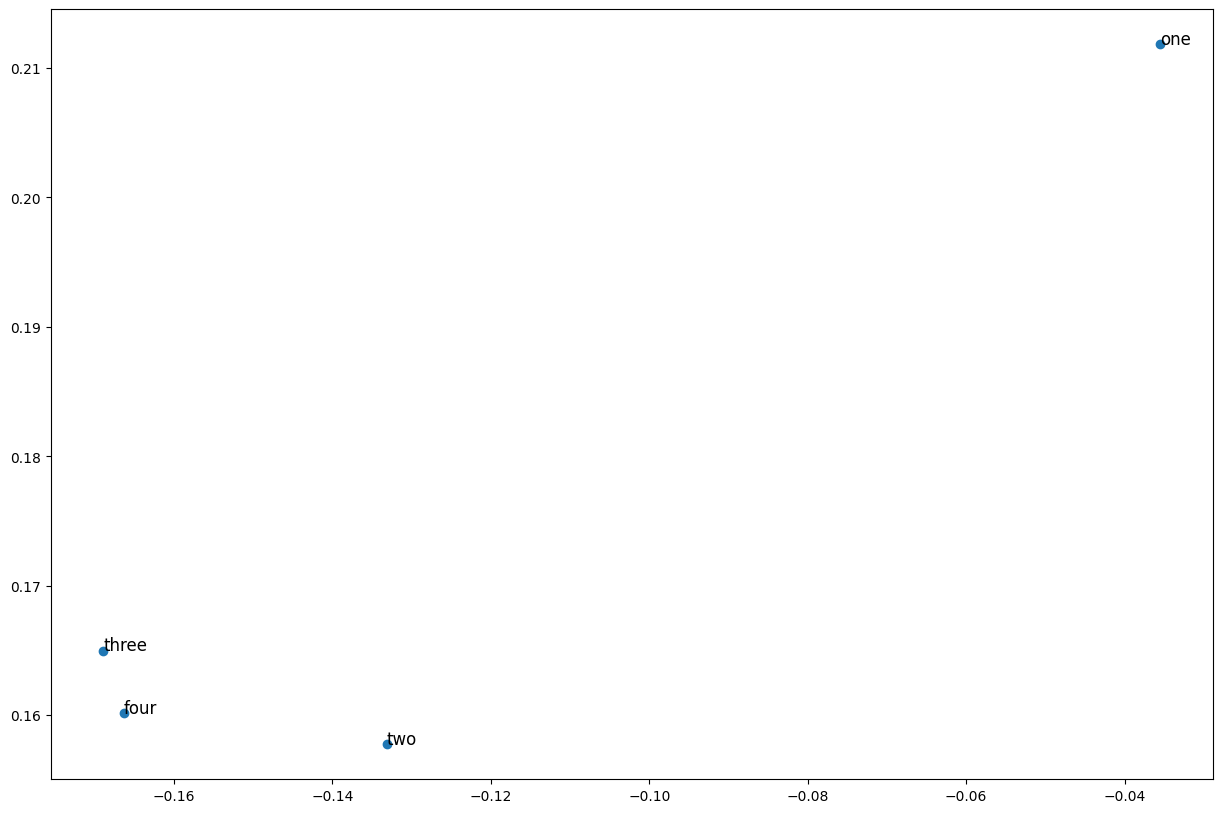

In [42]:
#
# Example of calling visualize_wordvecs...
#
#LoW = "breakfast lunch dinner coffee snake senate".split()     #  cereal python, one two three four five twelve
LoW = "one two three four".split() 
#LoW = "breakfast lunch dinner".split()  
visualize_wordvecs(LoW, m)    

###  hw8pr1 task #4: &nbsp; Your task: &nbsp;&nbsp; Create two more examples...

Using your own choice of words, create two more examples in the spirit of the ones above.

Let's say, at least four words for each. More words welcome!

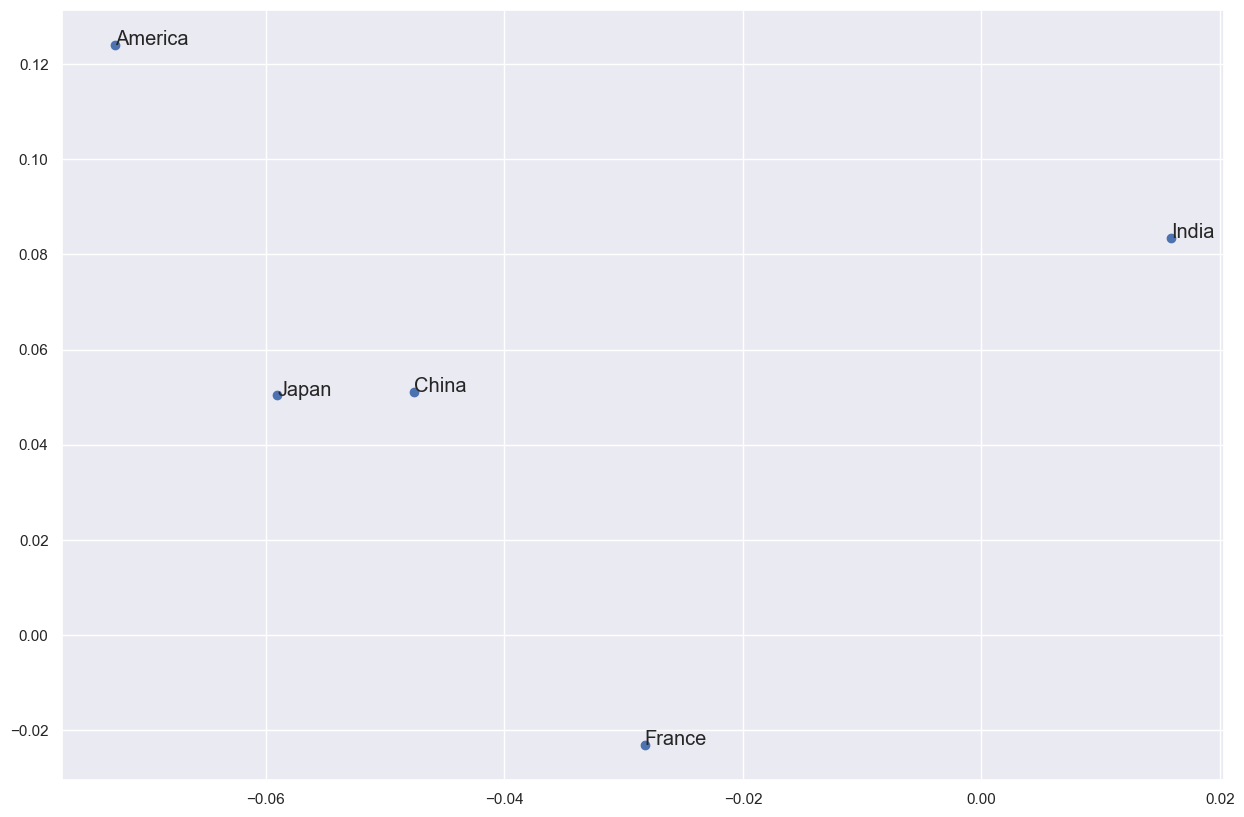

In [57]:
#
# Example of calling visualize_wordvecs...
#
#LoW = "breakfast lunch dinner coffee snake senate".split()     #  cereal python, one two three four five twelve
LoW2 = "America Japan China India France".split() 
visualize_wordvecs(LoW2, m)    

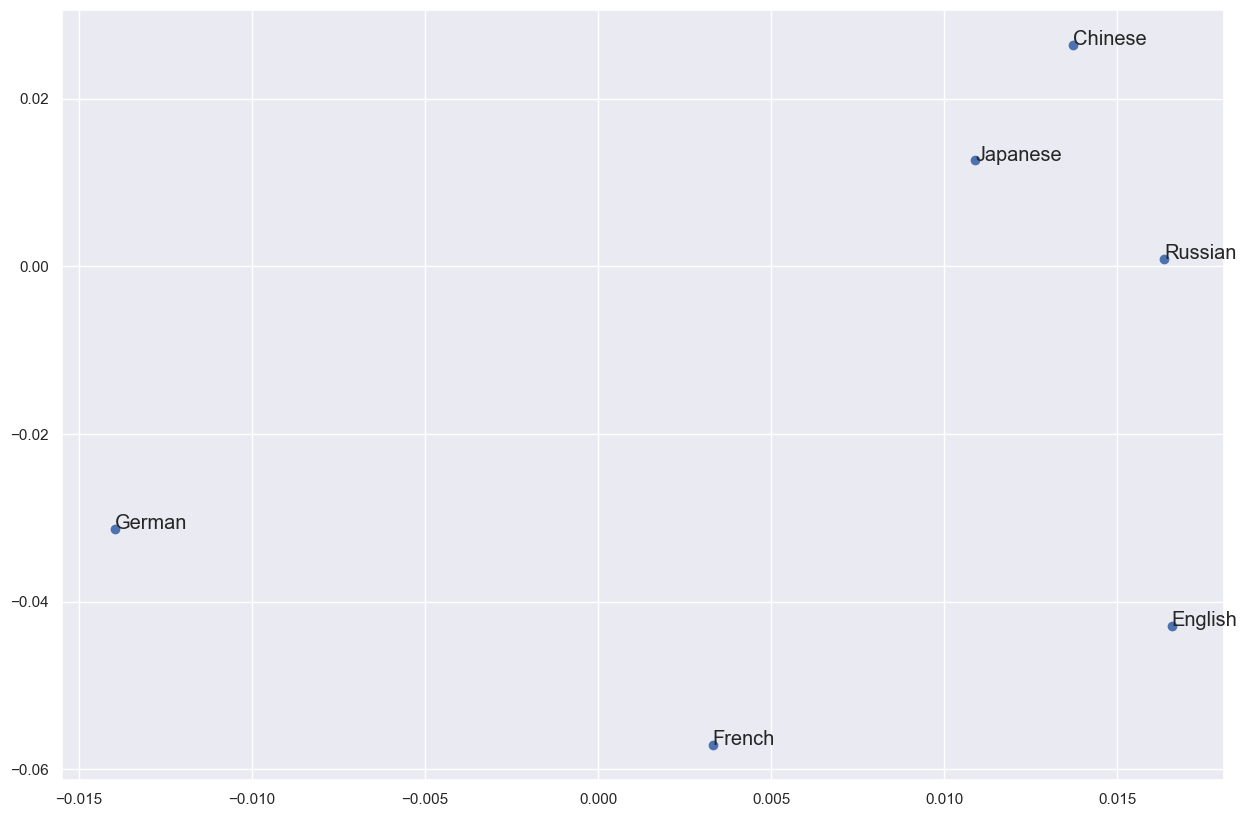

In [58]:
# Comparing language
LoW3 = "English French German Russian Chinese Japanese".split() 
visualize_wordvecs(LoW3, m) 

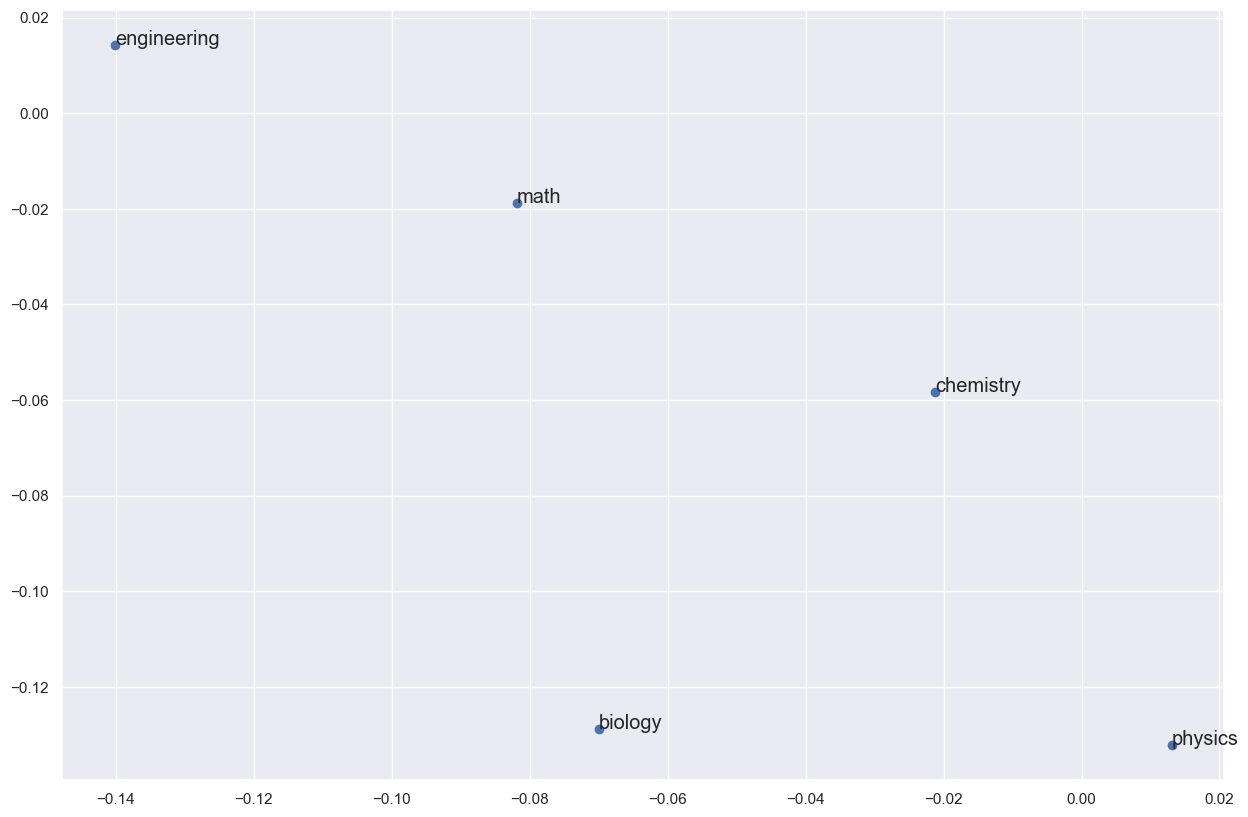

In [63]:
# Comparing STEM subjects
LoW4 = "engineering math physics biology chemistry".split()
visualize_wordvecs(LoW4,m)

<br>

<br>

<hr>

<br>

####  **Optional** &nbsp; Visualizing vocabulary similarities as a heat map

The next cell begins the process of visualizing similarity as a heat map.
+ (optional, ec) &nbsp; The challenge is to expand this into a full 2d visualization of similarities
+ First, for our two sets of words...
  + <tt>Keys = [ 'python', 'ruby', 'r', 'c', 'java', 'coffee' ]</tt> , along with
  + <tt>initial_words = "snake serpent python code ai ml programming".split()</tt>
+ Then, for two more sets of words -- of your own design:

<br>

similarity between python and musician:   0.08
similarity between python and philosopher:   0.05
similarity between python and mathematician:   0.03
similarity between python and physicist:  -0.02
similarity between python and scientist:   0.03
similarity between python and artist:   0.15
LoS is [0.07785391, 0.045812987, 0.02609564, -0.015833125, 0.025086502, 0.1495049]
LoW is ['musician', 'philosopher', 'mathematician', 'physicist', 'scientist', 'artist']


'Result:'

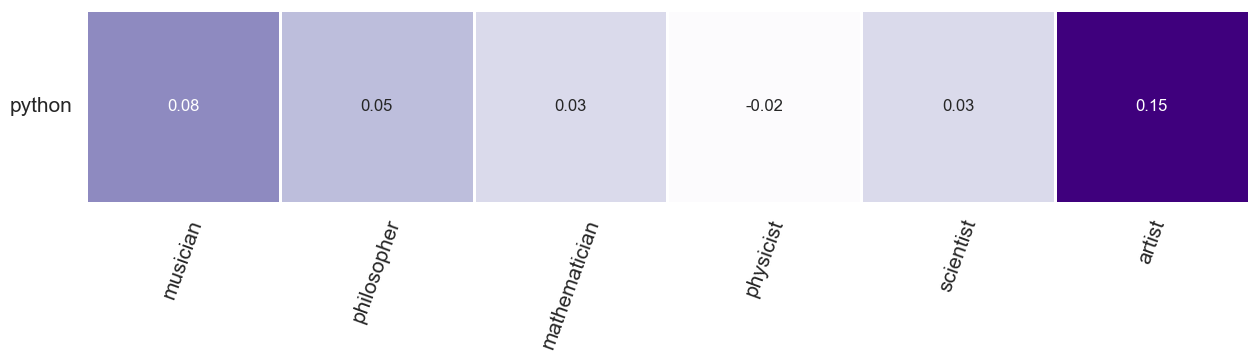

In [43]:
# Starting point for visualizing 2d similarity via a heat map

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

# adaptation of the previous similarity-based code
key = 'python'      # this is a _single_ word - the task is to loop over the list, perhaps named Keys
LoS = []
LoW = []
for w in initial_words:
    if w in m:  # is the word, w present in the vocabulary?
        similarity = m.similarity(key,w)
        print(f"similarity between {key} and {w}: {similarity:6.2f}", )
        LoS.append( similarity )
        LoW.append( w )
    else:
        print(f"  __  {w}  __ was not in the vocabulary", )   # not every word will be present

print(f"LoS is {LoS}")
print(f"LoW is {LoW}")

my_data_list = [ LoS ]
my_dataframe = pd.DataFrame(my_data_list, columns=LoW)


# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(15,10))  # (18, 12)
sns.heatmap(data=my_dataframe, annot=True, fmt="4.2f", linewidths=2, yticklabels=["python"], square=True, cmap="Purples", cbar=False, ax=ax)

ylocs, ylabels = plt.yticks()
plt.setp(ylabels, rotation=0, fontsize=15)
xlocs, xlabels = plt.xticks()
plt.setp(xlabels, rotation=70, fontsize=15)
"Result:"

# The goal is to output a square heatmap with all of the similarities plotted...

<br>

### More word-embedding geometry:  Analogies
+ These are an introduction to the analogy problem in hw8 (see the google doc for more detail!)
+ For the moment, we'll keep the examples and explorations in this notebook:

In [44]:
#
# Let's take a look at some additional "geometry" of word-meanings (cool!)
#

m.most_similar(positive='python', topn=10)  # negative='snake'

[('snake', 0.660629153251648),
 ('crocodile', 0.6591363549232483),
 ('alligator', 0.64216548204422),
 ('boa', 0.5617719292640686),
 ('constrictor', 0.5378887057304382),
 ('constrictors', 0.5356364846229553),
 ('snakes', 0.5345131754875183),
 ('anaconda', 0.5207394957542419),
 ('rabbit', 0.5074971318244934),
 ('tortoise', 0.5046288967132568)]

In [45]:
#
# With this most_similar method, we can "subtract" vectors, too:
#

m.most_similar(positive='python', negative='snake', topn=10) 

[('Java', 0.22111037373542786),
 ('Dior', 0.2102828174829483),
 ('Notte', 0.2078552097082138),
 ('os', 0.19944755733013153),
 ('frock', 0.19739562273025513),
 ('blouse', 0.19704443216323853),
 ('plaids', 0.19696447253227234),
 ('blazer', 0.1878664493560791),
 ('gown', 0.17895956337451935),
 ('Gala', 0.17834942042827606)]

In [66]:
#
# Here, see if you can determine the analogy that is being computed using word embeddings:
# 

m.most_similar(positive=['king','woman'], negative=['man'], topn=10) 

[('kingdom', 0.24925880134105682),
 ('illegitimate', 0.23341096937656403),
 ('Sultan', 0.2278379201889038),
 ('Wilcke', 0.22153809666633606),
 ('filed', 0.21197128295898438),
 ('Ministry', 0.20485468208789825),
 ('discriminating', 0.1962185800075531),
 ('demand', 0.1950933039188385),
 ('Kant', 0.1901511698961258),
 ('decree', 0.18994896113872528)]

In [84]:
# 
# This problem is about building and testing analogies...
# 
# This function has a hard-coded set of words, i.e., 'woman', 'king', and 'man'
# Your tasks:
#      + add inputs to the function 
#
def test_most_similar(m):
    """ example of most_similar """
    print("Testing most_similar on the king - man + woman example...")
    #results = m.most_similar(positive=['woman', 'king'], negative=['man'], topn=10) # topn == # of results
    results = m.most_similar(positive=['woman', 'king'], negative=['man'], topn=100) # topn == # of results
    return results

hard_coded_results = test_most_similar(m)
hard_coded_results

Testing most_similar on the king - man + woman example...


[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902430415153503),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236843228340149),
 ('queens', 0.5181135535240173),
 ('throne', 0.5005807280540466),
 ('royal', 0.4938204884529114),
 ('ruler', 0.49092739820480347),
 ('princes', 0.481081485748291),
 ('goddess', 0.46613654494285583),
 ('kingdom', 0.455056756734848),
 ('palace', 0.45176565647125244),
 ('Princess', 0.43754076957702637),
 ('Queen', 0.43463781476020813),
 ('commoner', 0.4212746322154999),
 ('rajah', 0.4193156957626343),
 ('Duchess', 0.4068228304386139),
 ('emperor', 0.40543416142463684),
 ('Camilla', 0.4017578065395355),
 ('thrones', 0.3998573422431946),
 ('courtiers', 0.39595720171928406),
 ('regal', 0.3819999694824219),
 ('rulers', 0.37942641973495483),
 ('Sihanouk', 0.37839287519454956),
 ('sultans', 0.37643030285835266),
 ('King', 0.3749903440475464),
 ('nobles', 0.3740980923175812),
 ('emperors', 0.3723597228527069),
 ('courtesan', 0.37156

In [115]:
hard_coded_results[99]

('Throne', 0.3059627115726471)

###  hw8pr1 task #5: &nbsp; Your task: &nbsp;&nbsp; two _analogy_ functions

#### First, write `generate_analogy(word1, word2, word3, m)`  

Create a function `generate_analogy(word1, word2, word3, m)` that 
+ first checks if all three words, `word1`, `word2`, `word3` are in the model `m`
+ if not, it prints an error warning about this
+ if so, it returns `word4`, where `word1` : `word2` :: `word3` : `word4`
+ (This is using "analogy notation"!)
+ Warning:  the ordering of the words in the most_similar call is DIFFERENT (watch out!)

Be sure to test this on a few examples to find at least one that works well -- and one that does not!

<br>
<hr>
<br>


In [86]:
#
# here is a starting point for generate_analogy:

def generate_analogy(w1, w2, w3, m):
  """ returns word2vec's "answer" for w1:w2 :: w3:?? """
  if w1 not in m:  # example check
    print(f"{w1} was not in the model.")
    return
  if w2 not in m:  # example check
    print(f"{w2} was not in the model.")
    return
  if w3 not in m:  # example check
    print(f"{w3} was not in the model.")
    return
  else:
    results = m.most_similar(positive=[w3, w2], negative=[w1], topn=100)
    return results[0]

  


    return None

  return "queen"   # somtimes correct! :-)

In [85]:
#
# be sure to test -- and show off some of your own that work (and some that don't)
#

generate_analogy("man", "king", "woman", m)  
generate_analogy("Germany", "Berlin", "France", m)  

('Paris', 0.7672387361526489)

#### Then, write `check_analogy(word1, word2, word3, word4, m)`
+ This should return a "score" on how well the word2vec model `m` does at solving the analogy provided, i.e., 
  + `word1` : `word2` :: `word3` : `word4`
+ that is, it should determine where word4 appears in the top 100 (use topn=100) most-similar words
+ if it _doens't_ appear in the top-100, it should give a score of 0
+ if it _does_ appear, it should give a score between 1 and 100, but
  + a score of 100 means a perfect score. 
  + A score of 1 means that `word4` was the 100th in the list, which is index 99
+ Try it out!   
  + `check_analogy( "man", "king", "woman", "queen", m ) -> 100` <br>
  + `check_analogy( "woman", "man", "bicycle", "fish", m ) -> 0` <br>
  + `check_analogy( "woman", "man", "bicycle", "pedestrian", m ) -> 96` <br>

And, again be sure to find at least four of your own `check_analogy` examples:
  + at least one in the "top quartile" (75% to 100%) 
  + at least one in the "next quartile" (50% to 75%) 
  + at least one in the "next quartile" (25% to 50%) 
  + at least one in the "bottom quartile" (0% to 25%) 

In [116]:
#
# your check_analogy function
#
def check_analogy(w1,w2,w3,w4,m):
    '''return a "score" on how well the word2vec model `m` does at solving the analogy provided'''
    results = m.most_similar(positive=[w3, w2], negative=[w1], topn=100)
    score = 100
    for result in results:
        if w4 == result[0]:
            return score  #score
            
        score -= 1
    return score


   
 #       print("The 4th word is not contained in the list")
  #      return
   # else:
    #    print(f"Given {w1},{w2}.{w3},{w4}, the value is {i}")



print(check_analogy( "man", "king", "woman", "bishop", m ))
print(check_analogy( "woman", "man", "bicycle", "fish", m ))
print(check_analogy( "woman", "man", "bicycle", "pedestrian", m ))
print(check_analogy( "man", "king", "woman", "sultans", m ))
print(check_analogy( "man", "king", "woman", "maids", m ))
print(check_analogy( "man", "king", "woman", "beauteous", m ))
print(check_analogy( "man", "king", "woman", "Throne", m ))







5
0
96
75
50
25
1


In [ ]:
#
# and examples from each quartile!
#

